# Project 1
## B-IT Pattern Recognition



Presented on 10-Dec-2015 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

## Task 1.1
### Remove the outliers

### Load the data first

- We went with the approach **1** of reading multi-typed data as in `whExample.py`
    
    + We like it because it is more explicit

    + Or use `pandas`
    
- We are using **Python 3.4**, so some modifications were made for compatibility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

//anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
dt = np.dtype([('w', np.float), ('h', np.float), ('g', 'S1')])  # g is byte-string

data = np.loadtxt('data/whData.dat', dtype=dt, comments='#', delimiter=None)

ws = np.array([d[0] for d in data])
hs = np.array([d[1] for d in data])
gs = np.array([d[2].decode('utf-8') for d in data])

X = np.vstack((hs, ws, gs))  # data is going to be column-wise
# X.transpose()  # this will make it row-wise
X.shape

(3, 24)

### Raw Data
- Now, let's just plot it without modifications

    - We split the data based on gender

In [3]:
import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex

male : 17 ; female : 7


<IPython.core.display.Javascript object>


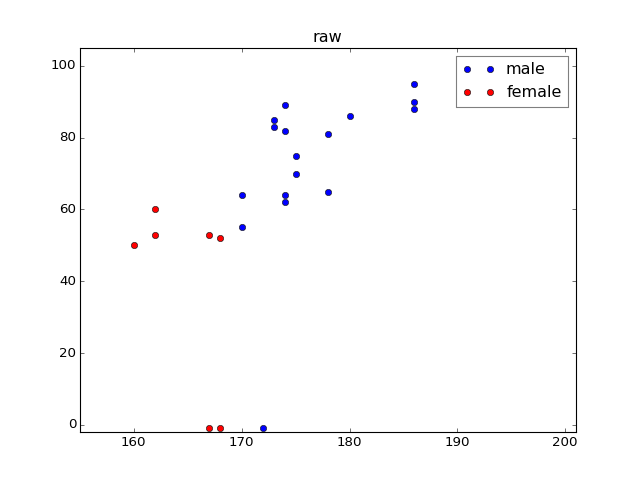

In [4]:
# split
X_male, X_female = pre_rex.split_data(X, True, 2, ['m', 'f'])
print("male :", X_male.shape[1], "; female :", X_female.shape[1])

# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

# limits for the axes
X_ = np.vstack((hs, ws))  # only the measurements; data is col-wise
xmin, ymin = X_.min(axis=1)
xmax, ymax = X_.max(axis=1)

xlim = [xmin-5, xmax+15]  # purely for looks
ylim = [-2, ymax+10]

plt_rex.plot2d(X_male, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="male")
plt_rex.plot2d(X_female, colwise_data=True, hatch='ro', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="female",
               title="raw")

### Outliers!!

Outliers may give important insights

### Dealing with the outliers
- Here, we just ignore them

    - We keep ...
    > only those data for which both measurements are positive.
    

- We find the *unique* columns/rows for which any of the measurements are negative 

    - Then we delete the entire columns/rows that contain such measurements

        + using `numpy.delete(...)`

<IPython.core.display.Javascript object>


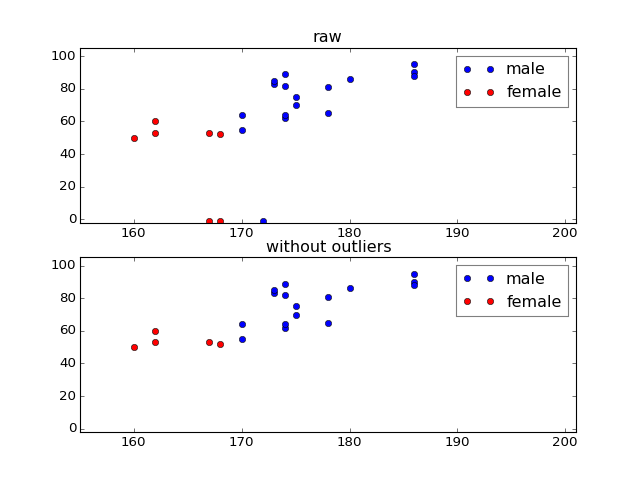

In [5]:
X_male_new = pre_rex.only_all_positive(X_male[0:2, :].astype(np.float), True)
X_female_new = pre_rex.only_all_positive(X_female[0:2, :].astype(np.float), True)

# plotting
fig = plt.figure()
axs1 = fig.add_subplot(211)
axs2 = fig.add_subplot(212)

# using the old xlim, ylim

plt_rex.plot2d(X_male, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs1, set_aspect_equal=False, plotlabel="male")
plt_rex.plot2d(X_female, colwise_data=True, hatch='ro', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs1, set_aspect_equal=False, plotlabel="female",
              title="raw")

plt_rex.plot2d(X_male_new, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs2, set_aspect_equal=False, plotlabel="male")
plt_rex.plot2d(X_female_new, colwise_data=True, hatch='ro', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs2, set_aspect_equal=False, plotlabel="female",
              title="without outliers")

***